In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
matplotlib.style.use('des_dr1')

In [2]:
def gen_linlin(x, points, data_len, numBins):
    """
    Interpolates through all points
    """
    # Sort the points by their x-coordinate
    if points is None:
        xp = [0, data_len-1]
        yp = [0, numBins-1]
    else:
        sorted_points = sorted(points, key=lambda pt: pt[0])

        # Create lists for x and y values including the endpoints
        xp = [0] + [pt[0] for pt in sorted_points] + [data_len-1]
        yp = [0] + [pt[1] for pt in sorted_points] + [numBins-1]
    
    # Use numpy.interp to compute the interpolated values
    y = np.interp(x, xp, yp)
    return y

In [3]:
data_len = 100
numBins = 15

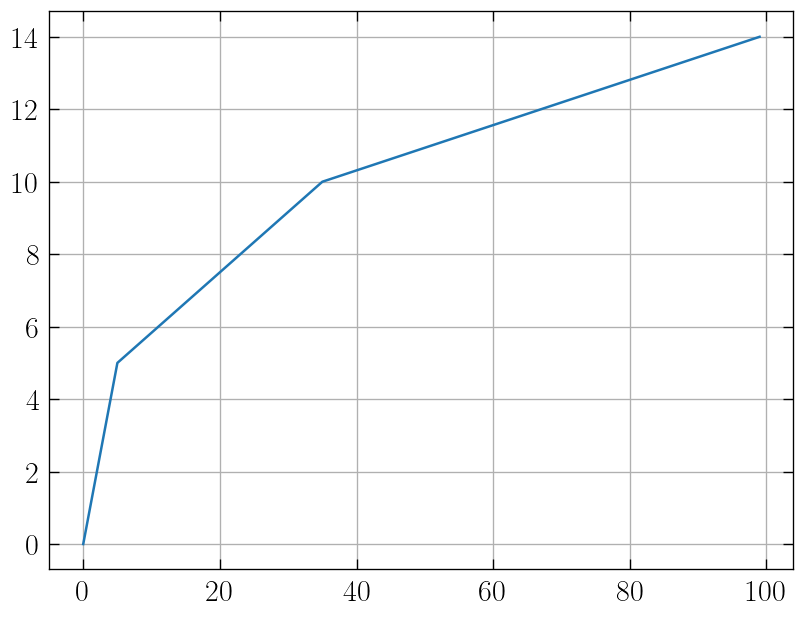

In [4]:
x = np.arange(data_len).astype(int)
pivots = [[5, 5], [35, 10]]
y = gen_linlin(x, pivots, data_len, numBins)
plt.figure(dpi = 120)
plt.plot(x, y)
plt.grid()
plt.show()

In [5]:
M = np.zeros((data_len, numBins), dtype=float)

# Compute the floor indices (left bin)
left_bins = np.floor(y).astype(int)
# Compute the next bin index (right bin)
right_bins = left_bins + 1
# Compute the fractional part
frac = y - left_bins

maskRight = right_bins >= numBins
maskLeft = left_bins < 0

maskNeither = (~maskRight)&(~maskLeft)
maskOnlyLeft = (~maskRight)&(maskLeft)
maskOnlyRight = (maskRight)&(~maskLeft)

# Neither side is masked, both within bounds
M[x[maskNeither], left_bins[maskNeither]] = 1.0 - frac[maskNeither]
M[x[maskNeither], right_bins[maskNeither]] = frac[maskNeither]

# For points where left_bins are within bounds only
M[x[maskOnlyRight], left_bins[maskOnlyRight]] = 1.0 - frac[maskOnlyRight]

# For points where right_bins are within bounds only
M[x[maskOnlyLeft], right_bins[maskOnlyLeft]] = frac[maskOnlyLeft]

In [6]:
np.round(y)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  7.,  7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  9.,  9.,  9.,  9.,  9., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 11., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 12., 12., 12., 12., 12., 12.,
       12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 12., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       14., 14., 14., 14., 14., 14., 14., 14., 14.])

In [7]:
M_round = np.zeros((data_len, numBins), dtype=float)
M_round[x, np.round(y).astype(int)] = 1

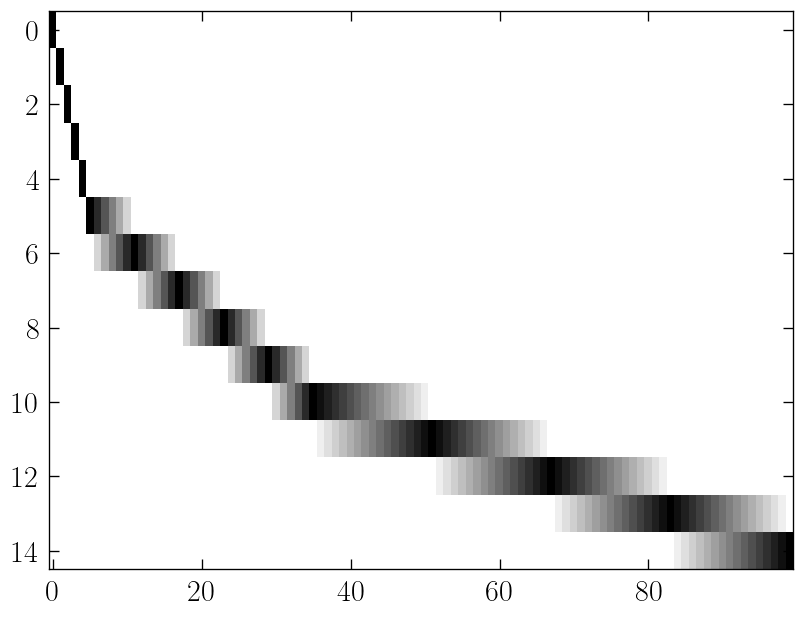

In [8]:
plt.figure(dpi = 120)
plt.imshow(M.T, aspect='auto', cmap='grey_r', vmin=0, vmax=1)
plt.show()

In [12]:
plt.figure(dpi = 120)
plt.imshow(M_round.T, aspect='auto', cmap='grey_r', vmin=0, vmax=1)
plt.plot(x, y, color='r', label=r'$f(x)$')
plt.legend()
plt.xlabel('Summary Statistic Index', fontsize=24)
plt.ylabel('Bin', fontsize=24)
plt.title('Construction of Binning Matrix', fontsize=24)
plt.colorbar()
plt.gca().invert_yaxis()
# Annotations
plt.annotate(
    'Pivots',
    xy=(np.array(pivots[0]) - np.array([50,5]))*0.9 + np.array([50,5]),
    xytext=(50, 5),
    arrowprops=dict(arrowstyle='->', color='k', shrinkB=5),
    fontsize=18
)
plt.annotate(
    'Pivots',
    xy=(np.array(pivots[1]) - np.array([50,5]))*0.9 + np.array([50,5]),
    xytext=(50, 5),
    arrowprops=dict(arrowstyle='->', color='k', shrinkB=5),
    fontsize=18
)
# plt.show()
plt.savefig('../Paper_Plots/Flip_Binning_Matrix_Construction.pdf', bbox_inches='tight', format='pdf')
plt.close()